# HDip in Science in Data Analytics for Business (FT) 
## Data Preparation and Machine Learning
 

  ## - Nuno Alfredo Ribeiro Teixeira de Almeida - 2021310

***

               
# Contents
## 1. [Introduction](#1)
   1.1. [Import Libraries](#1.1)                                                                                               
   1.2. [Size](#1.2)                                                                                                     
   1.3. [Columns Data](#1.3)                                                                                                   
   1.4. [Understanding Variables ](#1.4)                                                          
   1.5. [Descrobing Data](#1.5)                                                          
   1.6. [The 5 number summary](#1.6)                                                           
   1.7. [Missing Values and Zero Values](#1.7)                                                           
   1.8. [Other functions to check missing values](#1.8)                                                           
   1.9. [Correlation](#1.9)                                                           
   1.6. [Checking Missing Values and Zero Values](#1.7)                                                                                                                                                                                               
## 2. [Data Preparation](#2.)                                                                                                                      
   2.1. [Missing Values](#2.1)                                                                                               
   2.2. [Understanding Colunm "Class"](#2.2)                                                          
   2.3. [removing/ Cleaning Data Column](#2.3)                                                          
   2.4. [Normalization](#2.4)                                                                                                  
   2.5. [Analizing Outliers](#2.5)                                                              
        2.5.1 [Using quantile method to remove Outliers](#2.5.1)                                                              
        2.5.2 [Using Z-SCORE method to remove Outliers](#2.5.2)                                                                                                                              
### 3. [EDA Visualization](#3.)   
### 4. [Curse of Dimensionality](#4.)       
### 5. [LDA and PCA](#5.)    

   5.1. [LDA](#5.1)                                                                                                            
   5.2. [PCA](#5.2)                                                          
        5.2.1 [Chossing Components](#5.2.1)                                                          
        5.2.2 [Illustrate PCA](#5.2.2)                                                          
        
        
## 6. [Machine Learning](#6.)                                                                    
   6.1. [Machine Learning Model](#6.1)                                                          
       6.1.1 [Random Forest Model](#6.1.1)                                                          
       6.1.2 [KNN Classifier Model](#6.1.2)                                                          
   6.2. [Confusion Matrix](#6.2)                                                          
   6.3. [Display of the classification report](#6.3)                                                          
   6.4. [Hyperparameters](#6.4)                                                          
   6.5. [Cross-Validatioon](#6.4)                                                          
       6.5.1 [Random Forest](#6.5.1)                                                           
       6.5.1 [KNN](#6.5.2)                                                           
   
### 7. [Conclusion](#7.)       
###  [References](#r.)        
    

***

# 1. Introduction<a name="1"></a>

In the introduction we will develop the work in order to identify the initial information of our dataset, as well as variables, size, what type of data we are using and apply basic functions to better understand our analysis.
Next we will apply Data Praparation where we will make an Engeniring feature and apply LDA and PCA models to understand dimensions and components.
The work will be divided into some steps, these will be highlighted by sections and after Data preparation, we will bring applications of models in Machine Learning, seeking to understand the best results among their variables and models developed.

### 1.1 Import Libraries <a name="1.1"></a>

We will import libraries from Pandas, Seaborn, Numpy, Matplolib folders so that we can use them to read the dataset, as well as recognize numbers and work with plotting their results that we will use later. We also added warnings that free us from any error messages caused by a different version of Jupyter. So the formulas can work normally.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
mach = pd.read_csv("Shill Bidding Dataset.csv") 

In [3]:
mach

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


### 1.2 Size<a name="1.2"></a>

As we can verify the dataer has a size according to the result of the Shape function. This one brings us directly the result of the number of rows and columns of the Dataset, but below I used a custom form to bring and be more readable highlighting the personalized phrase with the result of the mentioned function.

In [4]:
mach.shape
print('Number of rows in the data = {}'.format(mach.shape[0]))
print('Number of Columns in the data = {}'.format(mach.shape[1]))

Number of rows in the data = 6321
Number of Columns in the data = 13


### 1.3 Columns Data <a name="1.3"></a>

Through the Column function we can analyze which variables will be available in the Dataset. We got the same result as the previous function, but it brings its values, in this case labels.

In [5]:
mach.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

As variables of this dataset: "Bids dataset" brings us meanings and are used for understanding. The dataset has data from a Leião proposal or spears generated by some consumer and through variables we can have bidder results, time, proportion under spears, price increase, as well as highlighted:

### 1.4 Understanding Variables <a name="1.4"></a>

Record ID: Unique identifier of a record in the dataset.                                                
Auction ID: Unique identifier of an auction.                                                
Bidder ID: Unique identifier of a bidder.                                                
Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.                                                
Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.                                                                                                
Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.                                                
Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.                                                                                                
Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.                                                                                                
Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.                                                
Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.                                                                                                
Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions.                                                
Auction Duration: How long an auction lasted.                                                
Class: 0 for normal behaviour bidding; 1 for otherwise.                                                

### 1.5 Describing Data  <a name="1.5"></a>

In [6]:
mach.dtypes

Record_ID                   int64
Auction_ID                  int64
Bidder_ID                  object
Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object

we can check with the dtypes function, in which group of types each variable is characterized. In this case we have                
-int64: integers                                                                                                   
-Object: numbers/letters or symbols used                                                                              
-float: numbers with decimals.

In [7]:
mach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


With the info function, we can read the Dataset, making it easy to identify the aforementioned information regarding size, data types in each variable, variable names and memory usage. And we can already do a preliminary analysis of the Dataset, how to understand if it has zero values in any column and etc. In this case, we will highlight the necessary functions below.

### 1.6 The 5 number summary  <a name="1.6"></a>

The 5 number sumary bring information through the function df.describe()
Count/ mean / std / min / máx  and news information that we didn´t check before the interquartile ranges (25%, 50% 75%)

"The interquartile range is a useful measure of variability and is given by the lower and upper quartiles. The interquartile range is not vulnerable to outliers and, whatever the distribution of the data, we know that 50% of observations lie within the interquartile range." ( Campbell, 2007)

In [8]:
mach.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [9]:
mach.describe(include=object)

,Bidder_ID
count,6321
unique,1054
top,a***a
freq,112


### 1.7 Checking Missing Values and Zero Values  <a name="1.7"></a>

Missing values inn the data can harm the analysis, as they are values that should be filled in some way, to bring us results, The following function transforms all values into a single na_values symbology, to perform later reading with an additional function and understand if we have missing values in the dataset.

In [10]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
mach = pd.read_csv("Shill Bidding Dataset.csv", na_values = missing_value_formats)

In [11]:
mach

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


Checking through the following function to bring in a table, which values ​​and their percentage of missing values. A total of 0 missing values ​​were found in the Dataset, which leads us to understand that the data is all filled with data that can be analyzed and used in new analyzes if changes are needed.

In [12]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(mach)

Your selected dataframe has 13 columns and 6321 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


### 1.8  Other functions to check missing values  <a name="1.8"></a>

In [13]:
mach.isna().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

Next, using the value.counts function to understand if we have other values besides the numbers as highlighted in the Dtypes function. To confirm the information.

In [14]:
mach["Successive_Outbidding"].value_counts(dropna=False, normalize=True)*100

0.0    86.663503
1.0     7.419712
0.5     5.916785
Name: Successive_Outbidding, dtype: float64

In [15]:
mach["Successive_Outbidding"].value_counts()

0.0    5478
1.0     469
0.5     374
Name: Successive_Outbidding, dtype: int64

Another way to understand if we have null or unused values for the analysis are the following:                                     
    - Isnull function that will bring all the counts by column or the function with any thus brings us False, for negative and True to say that it has null values.

In [16]:
(mach.isnull().sum()/mach.shape[0]* 100)

Record_ID                 0.0
Auction_ID                0.0
Bidder_ID                 0.0
Bidder_Tendency           0.0
Bidding_Ratio             0.0
Successive_Outbidding     0.0
Last_Bidding              0.0
Auction_Bids              0.0
Starting_Price_Average    0.0
Early_Bidding             0.0
Winning_Ratio             0.0
Auction_Duration          0.0
Class                     0.0
dtype: float64

In [17]:
mach.isnull().values.any()

False

In [18]:
mach[mach['Auction_Duration'].isna()]

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class


###  1.9 Correlation <a name="1.9"></a>

Using the correlation function. Previously, we know the dataset, check its size, its variables, analyze its data. Now we will bring the information that brings the relationship of all variables in Pearson model. Next in the df.Corr function

In [19]:
mach_correlation= mach.corr()
mach_correlation.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,1.000000,-0.003776,0.011075,-0.040123,0.005271,0.037588,0.048377,0.001265,0.031719,-0.057151,-0.012150,-0.003731
Auction_ID,-0.003776,1.000000,-0.006902,-0.021424,-0.003175,0.070341,0.097558,0.016182,0.068427,-0.039779,0.024918,-0.007985
Bidder_Tendency,0.011075,-0.006902,1.000000,0.293076,0.313510,0.044999,0.086564,0.073242,0.019978,0.212170,0.000244,0.295533
Bidding_Ratio,-0.040123,-0.021424,0.293076,1.000000,0.604828,-0.066541,-0.347831,-0.252289,-0.147773,0.642905,-0.019205,0.569435
Successive_Outbidding,0.005271,-0.003175,0.313510,0.604828,1.000000,0.098941,0.065361,0.052263,0.056798,0.382002,0.010091,0.901035


# 2. Data preparation<a name="2."></a>

### 2.1  Missing Values<a name="2.1"></a>

There are no missing Values 

In [20]:
mach.isnull()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,False,False,False,False,False,False,False,False,False,False,False,False,False
6317,False,False,False,False,False,False,False,False,False,False,False,False,False
6318,False,False,False,False,False,False,False,False,False,False,False,False,False
6319,False,False,False,False,False,False,False,False,False,False,False,False,False


### 2.2 Understanding Colunm "Class"<a name="2.2"></a>

In [21]:
mach["Class"].value_counts(dropna=False, normalize=True)*100

0    89.32131
1    10.67869
Name: Class, dtype: float64

In [22]:
mach.stack().value_counts("Class").to_dict()
print(mach["Class"])

0       0
1       0
2       0
3       0
4       0
       ..
6316    1
6317    0
6318    0
6319    0
6320    0
Name: Class, Length: 6321, dtype: int64


In [23]:
mach["Class"].unique()

array([0, 1], dtype=int64)

In [24]:
mach["Class"].value_counts()

0    5646
1     675
Name: Class, dtype: int64

In [25]:
mach.corr()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,1.000000,-0.003776,0.011075,-0.040123,0.005271,0.037588,0.048377,0.001265,0.031719,-0.057151,-0.012150,-0.003731
Auction_ID,-0.003776,1.000000,-0.006902,-0.021424,-0.003175,0.070341,0.097558,0.016182,0.068427,-0.039779,0.024918,-0.007985
Bidder_Tendency,0.011075,-0.006902,1.000000,0.293076,0.313510,0.044999,0.086564,0.073242,0.019978,0.212170,0.000244,0.295533
Bidding_Ratio,-0.040123,-0.021424,0.293076,1.000000,0.604828,-0.066541,-0.347831,-0.252289,-0.147773,0.642905,-0.019205,0.569435
Successive_Outbidding,0.005271,-0.003175,0.313510,0.604828,1.000000,0.098941,0.065361,0.052263,0.056798,0.382002,0.010091,0.901035
Last_Bidding,0.037588,0.070341,0.044999,-0.066541,0.098941,1.000000,0.297639,0.293323,0.950096,-0.076726,0.011454,0.097655
Auction_Bids,0.048377,0.097558,0.086564,-0.347831,0.065361,0.297639,1.000000,0.629086,0.298878,-0.381442,0.093331,0.044964
Starting_Price_Average,0.001265,0.016182,0.073242,-0.252289,0.052263,0.293323,0.629086,1.000000,0.302958,-0.262655,0.022990,0.042604
Early_Bidding,0.031719,0.068427,0.019978,-0.147773,0.056798,0.950096,0.298878,0.302958,1.000000,-0.137005,0.011296,0.053570
Winning_Ratio,-0.057151,-0.039779,0.212170,0.642905,0.382002,-0.076726,-0.381442,-0.262655,-0.137005,1.000000,-0.023965,0.394122


### 2.3 removing/ Cleaning Data Column<a name="2.3"></a>

Removing the columns that should be to identify persons or calssify the user. But the objective is understand all data set to get relation with other variables and these variables can be a problem in that step. 


In [26]:
mach = mach.drop(["Record_ID","Auction_ID","Bidder_ID"], axis=1)
mach.head(8)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0
5,0.038462,0.111111,0.0,0.016844,0.0,0.000000,0.016844,0.800000,7,0
6,0.400000,0.222222,0.0,0.006781,0.0,0.000000,0.006774,0.750000,7,0
7,0.137931,0.444444,1.0,0.768044,0.0,0.000000,0.016311,1.000000,7,1


In [27]:
mach1 = mach

### 2.4 Normalization <a name="2.4"></a>

Analizing the column (Auction_Duration) can do interference in our results from Outliers after normalized. 

Using the normalization of specific columns to characterize and insert in the dataset, "Auction_Duration" had integer numbers that went beyond the numbers of the other datasets. So it was necessary to normalize your data so that they can be worked on in the next ones. of having a relevant one was chosen not to have allowed it.

In [28]:
import pandas as pd
import sklearn.preprocessing as preproc
mach1['Auction_Duration_norm'] = preproc.normalize(mach[['Auction_Duration']],axis=0)

In [29]:
machnorm = mach1.drop(columns=["Auction_Duration"])

In [30]:
machnorm

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class,Auction_Duration_norm
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0,0.012018
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0,0.012018
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0,0.012018
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0,0.012018
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0,0.016826
...,...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,1,0.007211
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,0,0.016826
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,0,0.016826
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,0,0.016826


In [31]:
round(mach.groupby('Auction_Duration')['Class'].mean().sort_values(ascending=False).iloc[:10],1)

Auction_Duration
7     0.1
1     0.1
5     0.1
3     0.1
10    0.0
Name: Class, dtype: float64

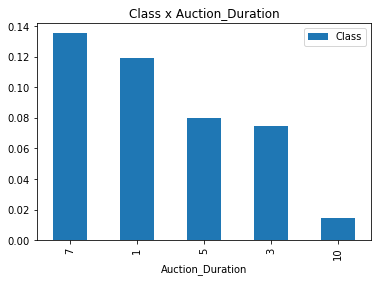

In [32]:
df_fig = pd.DataFrame(mach.groupby(['Auction_Duration'])['Class'].mean().sort_values(ascending=False)[:30])
df_fig.plot.bar()
plt.title('Class x Auction_Duration')
plt.show()

### 2.5 Analizing Outliers <a name="2.5"></a>

An outlier analysis was performed using two functions. One of the functions is the Quantile that we normally use. In this case, Outliers were identified leaving the data set with a reduction to 4985 lines. However, when analyzing our DataSet, we have the Class column, which is our study objective, being relevant to the process, and ended up removing all the values "1" from this variable, which changes the result of our study. Then it was analyzed through the reduction of Z-scores function that does not have outliers to remove from our Dataset.

#### 2.5.1 Using quantile method to remove Outliers <a name="2.5.1"></a>

In [33]:
Q1 = machnorm.quantile(0.25) 
Q3 = machnorm.quantile(0.75) 
IQR = Q3 - Q1 
print(IQR)

Bidder_Tendency           0.139640
Bidding_Ratio             0.123188
Successive_Outbidding     0.000000
Last_Bidding              0.812434
Auction_Bids              0.454545
Starting_Price_Average    0.993593
Early_Bidding             0.800140
Winning_Ratio             0.851852
Class                     0.000000
Auction_Duration_norm     0.009615
dtype: float64


In [34]:
machout = machnorm[~((machnorm< (Q1-1.5 * IQR)) |(machnorm > (Q3 + 1.5 * IQR))).any(axis=1)]
machout.shape   

(4985, 10)

In [35]:
machout["Class"].value_counts()

0    4985
Name: Class, dtype: int64

#### 2.5.2 Using Z score method to remove Outliers <a name="2.5.2"></a>

In [36]:
from scipy import stats
import numpy as np

for column in machnorm : 
    z = np.abs(stats.zscore(machnorm[column]))
    machzscore = machnorm[(z <= 3)]
print(machzscore.shape)

(6321, 10)


In [37]:
machzscore["Class"].value_counts()

0    5646
1     675
Name: Class, dtype: int64

In [38]:
print('Before cleaning {} rows for anlysis'.format(mach.shape[0]))

print('After Quantile cleaning {} rows foranlysis'.format(machout.shape[0]))
print('After z-score method {} rows for anlysis'.format(machzscore.shape[0]))


Before cleaning 6321 rows for anlysis
After Quantile cleaning 4985 rows foranlysis
After z-score method 6321 rows for anlysis


<AxesSubplot:xlabel='Auction_Duration_norm'>

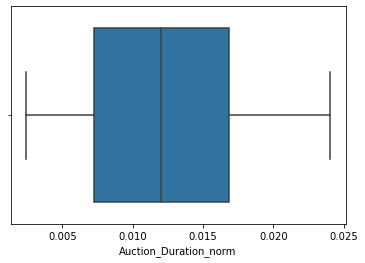

In [39]:
sns.boxplot(x=machout["Auction_Duration_norm"])

<AxesSubplot:xlabel='Auction_Duration_norm'>

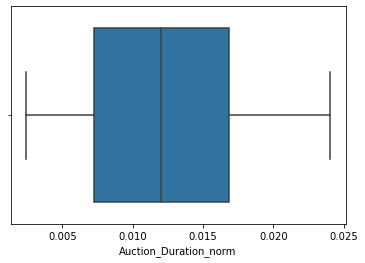

In [40]:
sns.boxplot(x=machzscore["Auction_Duration_norm"])

<AxesSubplot:xlabel='Successive_Outbidding'>

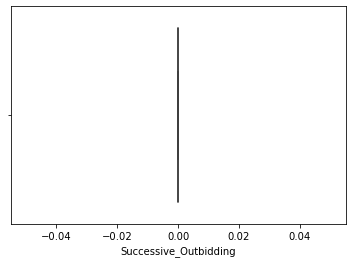

In [41]:
sns.boxplot(x=machout["Successive_Outbidding"])

<AxesSubplot:xlabel='Successive_Outbidding'>

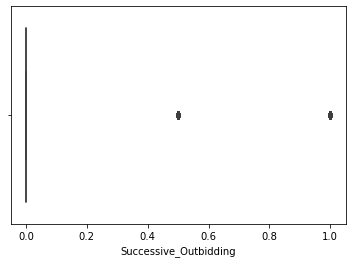

In [42]:
sns.boxplot(x=machzscore["Successive_Outbidding"])

In that case we can no remove outliers. The reason is that using quantile mode the outliers will remove to 4985 rows and they will interfere the results from our column Class. removing all values "1".

***

## 3. EDA Visualization<a name="3."></a>

We can observe that the correlation of the variables brings us an interesting analysis between them. With the Variable “Class” we can verify that they have a very strong correlation with: “Successive_Outbidding”, “Bidding_Ratio”, “Winning_Ratio” and “Bidder_Tendency”. In which we will show some correlations between them and other variables through graphs.

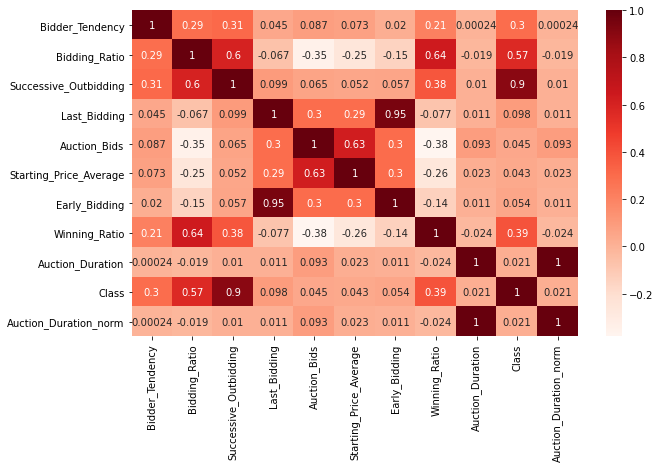

In [43]:
plt.figure(figsize=(10,6))
machcor = mach.corr()
sns.heatmap(machcor, annot=True, cmap=plt.cm.Reds)
plt.show()


<AxesSubplot:xlabel='Successive_Outbidding', ylabel='Class'>

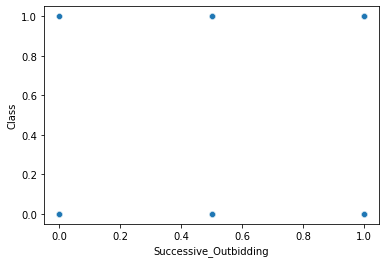

In [44]:
sns.scatterplot(data=machnorm, x="Successive_Outbidding", y="Class")

<AxesSubplot:xlabel='Early_Bidding', ylabel='Last_Bidding'>

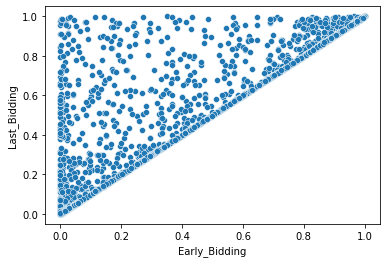

In [45]:
sns.scatterplot(data=machnorm, x="Early_Bidding", y="Last_Bidding")

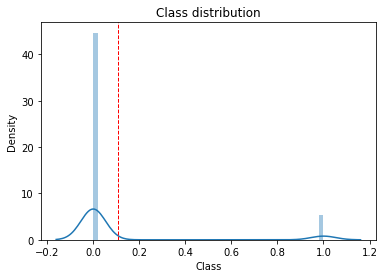

In [46]:
sns.distplot(machnorm['Class'])
plt.axvline(machnorm['Class'].values.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Class distribution');

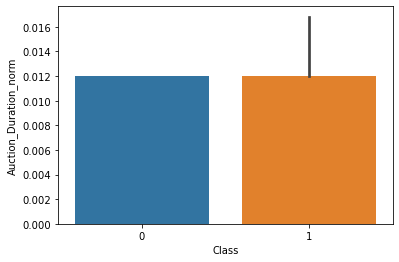

In [47]:
from numpy import median

ax = sns.barplot(x="Class", y="Auction_Duration_norm", data=machnorm.iloc[:], estimator=median)

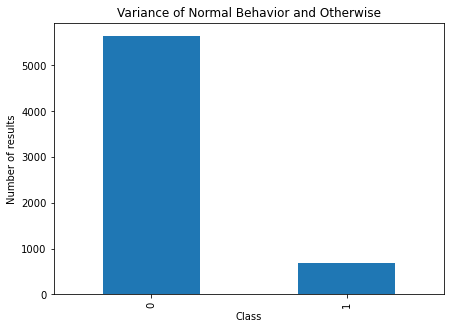

In [48]:
# Plotting a Histogram 
machnorm["Class"].value_counts().nlargest(40).plot(kind="bar", figsize=(7,5)) 
plt.title("Variance of Normal Behavior and Otherwise") 
plt.ylabel("Number of results") 
plt.xlabel("Class");

<AxesSubplot:>

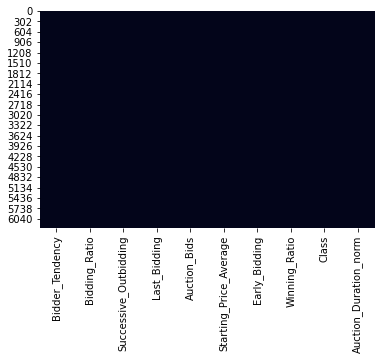

In [49]:
sns.heatmap(machnorm.isnull(), cbar=False)

In [50]:
def plot_hist(df,variable):
    var = df[variable]
    plt.figure(figsize = (9,3))
    sns.histplot(var,bins = 50,kde=True)
    plt.ylabel("Count")
    plt.xlabel(variable)
    plt.title("{} Distribituon".format(variable))
    plt.show()

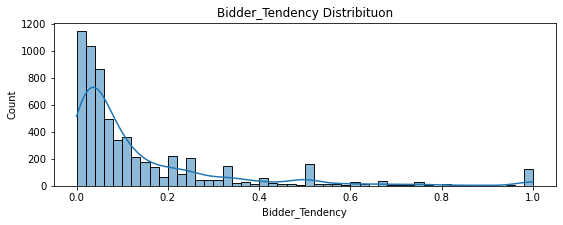

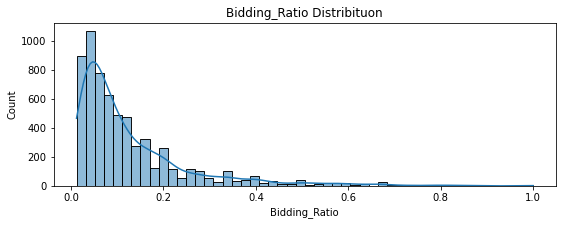

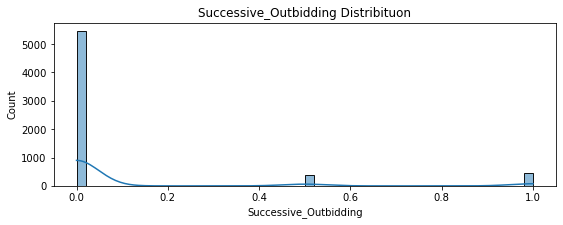

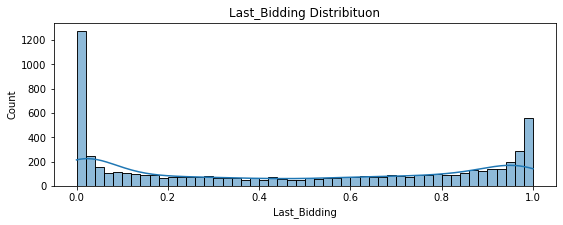

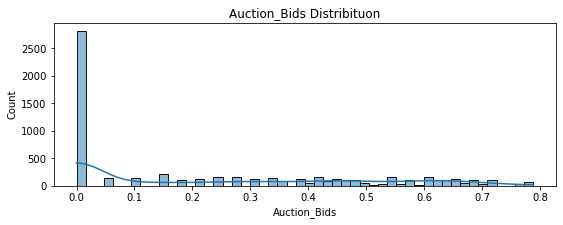

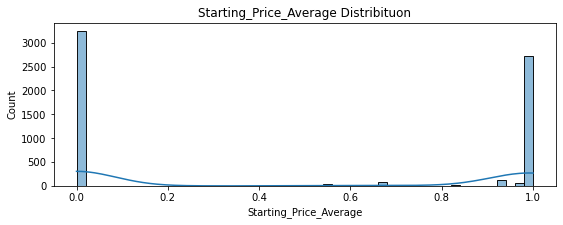

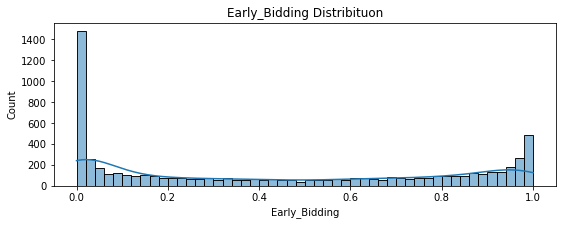

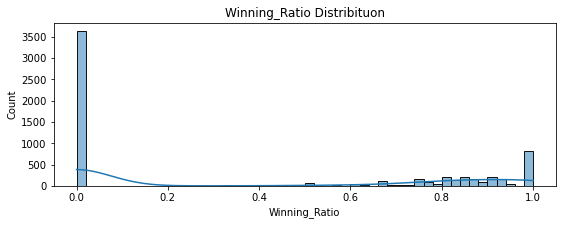

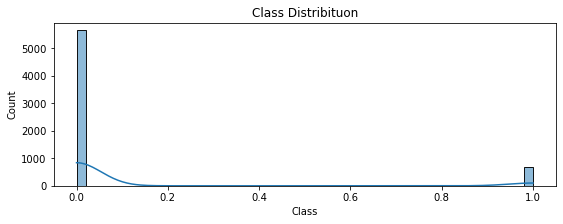

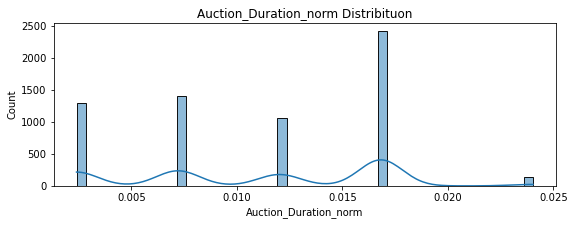

In [51]:
for var in machnorm:
    plot_hist(machnorm,var)

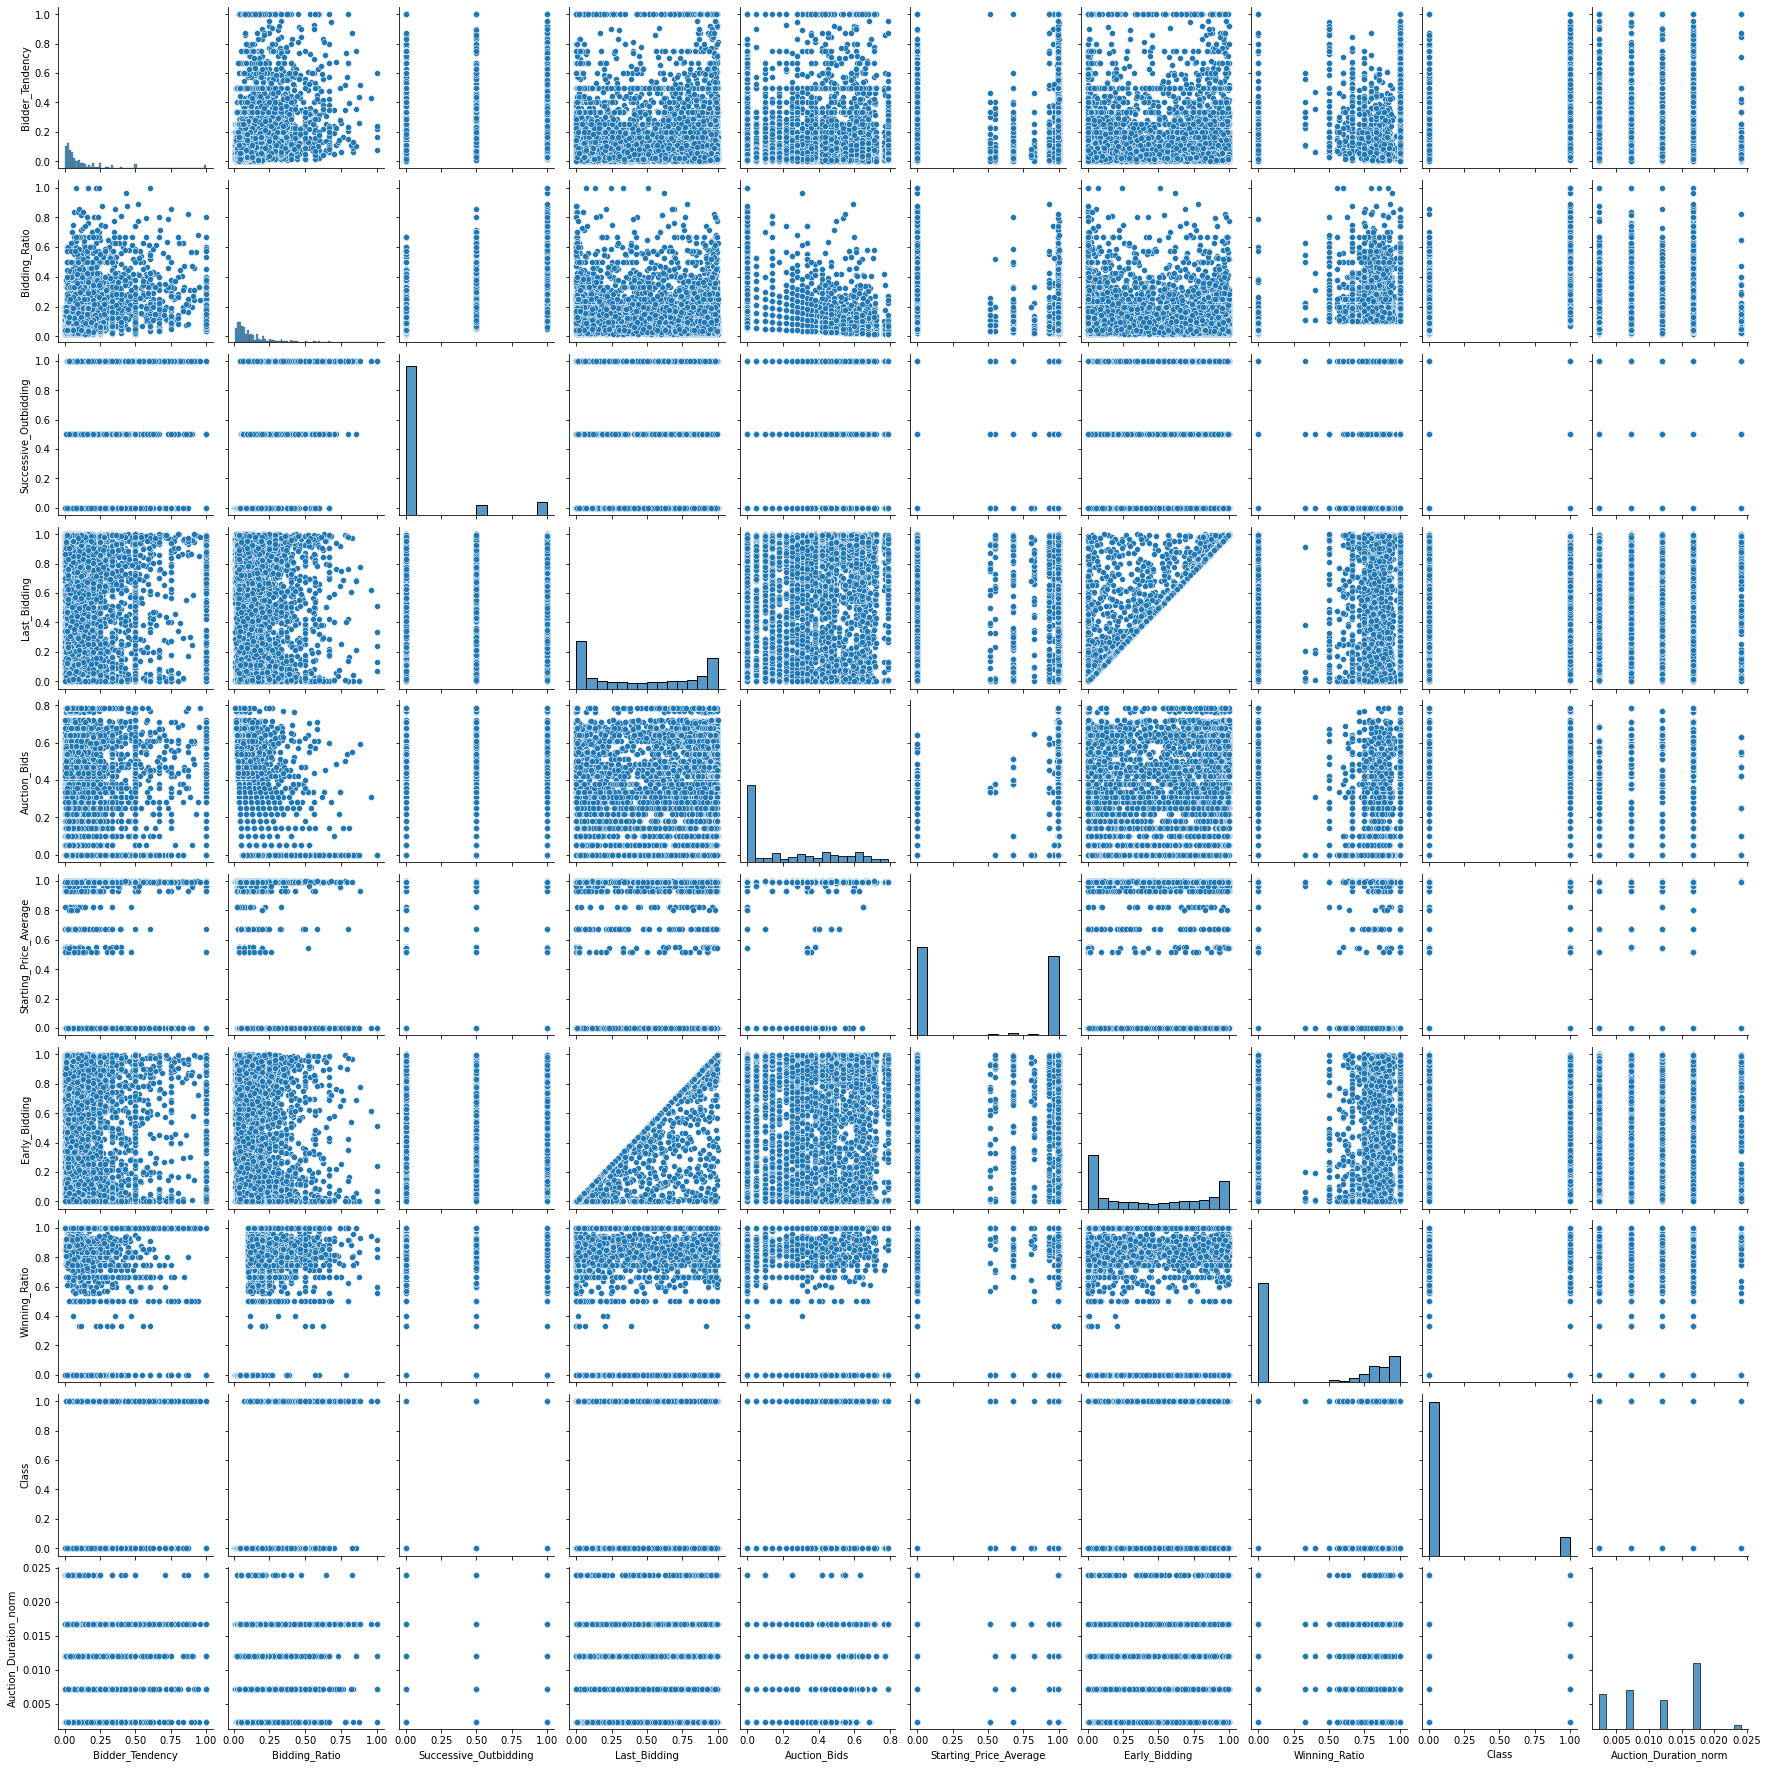

In [52]:
sns.pairplot(machnorm) 
plt.show()

Spliting the Data 

##  4. Curse of Dimensionality <a name="4."></a>

The curse of dimensionality refers to dimension, as the name implies. In terms of data and the study that we conducted, we may draw a conclusion after completing all of the preceding procedures.
"The curse of dimensionality basically means that the error increases with the increase in the number of features. It refers to the fact that algorithms are harder to design in high dimensions and often have a running time exponential in the dimensions." (Choudhury, 2019)
Please bring a reference so that we can expand on the topic more. It is clear that the data contained sensitive information. To better examine them, we need to get them to values on more consistent scales. The larger the data set, the better.

***

## 5. LDA AND PCA <a name="5."></a>

Data categorization may be done in a variety of ways. Two widely used approaches for data categorization and dimensionality reduction are Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA). The circumstance when the within-class frequencies are uneven and their performances have been tested on randomly produced test data is simply handled using Linear Discriminant Analysis. In each given data set, this approach increases the ratio of between-class variation to within-class variance, ensuring maximum separability. The classification challenge in voice recognition is tackled with the help of Linear Discriminant Analysis.  ( Balakrishnama , 2021)


According Duvva(2021) The main difference is that the Linear discriminant analysis is a supervised dimensionality reduction technique that also achieves classification of the data simultaneously.While Principal component analysis is an unsupervised Dimensionality reduction technique, it ignores the class label.

### 5.1 LDA <a name="5.1"></a>

In [53]:
mach_noclass = machnorm.drop(columns=["Class"])

In [54]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn import preprocessing
le = LabelEncoder()
y = le.fit_transform(machnorm['Class'])
X = mach_noclass

In [55]:
y.shape

(6321,)

In [56]:
X.shape

(6321, 9)

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)


In [58]:
lda.explained_variance_ratio_

array([1.])

The results just get [1.0] variance, The data work as one dimension, the next function Could be used to reduce the dimentions, but as they give us just one results is it not possible. 

For teh cases to reduce dimension, the function np.linspace(1.0, num=1, endpoint=False) can be used from numpy librarie.

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

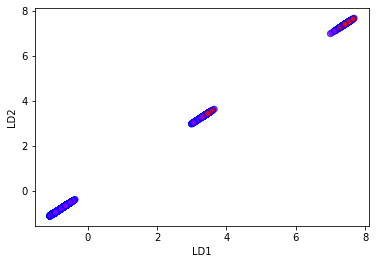

In [59]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,0],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

The graph shows the values and their perspectives among the results in one dimension, in which case we can see that the values are linear with intervals between them, showing a non-filling in the line. They have food projection and they are directly proportional.

### 5.2 PCA  <a name="5.2"></a>

In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

using the following function we can see the projection of variances Explanation of the components, with this graph it is possible to observe that the reduction of components in up to 8 components does not change the result in a predication model, being it important to identify the reduction of components in an analysis on Data Preparation and Machine Learning Models.

Text(0, 0.5, 'Cumulative Explained Variance')

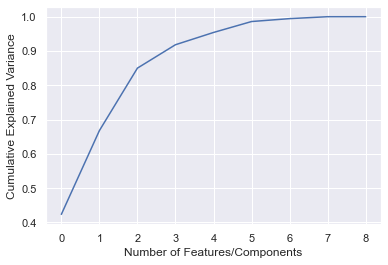

In [61]:
pca = PCA().fit(mach_noclass)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features/Components")
plt.ylabel("Cumulative Explained Variance")

For confirmation, the function below can bring us the value without the graph sample.

In [62]:
pca = PCA(0.995).fit(mach_noclass)
pca.n_components_

8

Show the components:

In [63]:
pca.components_

array([[ 2.37013887e-03, -8.31630752e-02, -1.34159346e-02,
         4.49516322e-01,  2.79053464e-01,  6.21207088e-01,
         4.63197057e-01, -3.35429090e-01,  3.23966097e-04],
       [ 9.71165486e-02,  1.51501250e-01,  2.79329503e-01,
         4.65860149e-01, -1.21507793e-01, -2.20240012e-01,
         4.25269007e-01,  6.54554443e-01, -2.09959863e-04],
       [ 1.46171206e-01,  1.10677609e-01,  3.11169608e-01,
        -2.84351681e-01,  1.44401055e-01,  6.59758084e-01,
        -3.20586829e-01,  4.79368037e-01,  1.35999331e-04],
       [ 2.71664516e-01,  1.38107857e-01,  7.90581753e-01,
        -2.30458295e-02,  2.37934006e-01, -2.43913867e-01,
        -4.06512878e-02, -4.04739684e-01,  8.29623105e-04],
       [ 8.14371131e-01, -7.61057623e-02, -3.83512288e-01,
         7.72587008e-03,  3.93635575e-01, -1.43131192e-01,
        -1.61797042e-02,  9.03757563e-02,  1.07086975e-03],
       [ 4.76848779e-01,  1.25067943e-01,  1.90648509e-02,
         3.46917740e-03, -8.10626162e-01,  2.240988

In [64]:
pca.explained_variance_

array([0.38940099, 0.22468939, 0.16762795, 0.06275336, 0.03288345,
       0.02932783, 0.00777654, 0.00514919])

In [65]:
pca.explained_variance_ratio_

array([0.42342604, 0.24432229, 0.18227493, 0.06823662, 0.03575673,
       0.03189043, 0.00845604, 0.00559912])

### 5.2.1 Chossing Components  <a name="5.2.1"></a>

Choosing the components and generating the table to show the values ​​of each components. Two components were chosen so that the results could be analyzed and compared to the LDA, and they were used in a similar way. However, it is worth noting that this decreases our variables at the time of performance.


In [66]:
pca = PCA(n_components=2)
principalComponents = pca.fit(mach_noclass)
principalcomponents = pca.fit_transform(mach_noclass)
X_pca = pca.transform(mach_noclass)
print("Original shape: {}".format(str(mach_noclass.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (6321, 9)
Reduced shape: (6321, 2)


In [67]:
machpca = pd.DataFrame(X_pca, columns = ["C1","C2"])

In [68]:
machpca.head()

,C1,C2
0,-0.270159,-0.271914
1,-0.335166,-0.125779
2,-0.362721,-0.086893
3,-0.276630,-0.006901
4,-0.815906,-0.202438


### 5.2.2 Illustrate PCA <a name="5.2.2"></a>

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [70]:
pca.explained_variance_ratio_

array([0.42342604, 0.24432229])

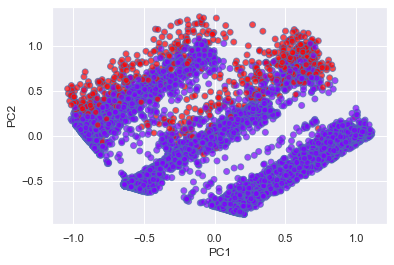

In [71]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

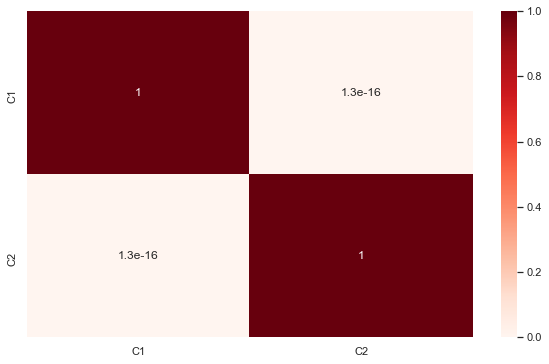

In [72]:
plt.figure(figsize=(10,6))
cor = machpca.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<AxesSubplot:>

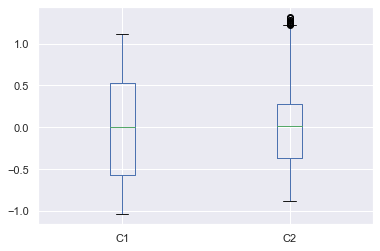

In [73]:
machpca.plot.box()

In [74]:
machpca['Class'] = machnorm['Class']

In [75]:
machpca.head()

,C1,C2,Class
0,-0.270159,-0.271914,0
1,-0.335166,-0.125779,0
2,-0.362721,-0.086893,0
3,-0.276630,-0.006901,0
4,-0.815906,-0.202438,0


***

# 6. Machine Learning  <a name="6."></a>

##### Classification 

Our dataset bring a classificated model from supervised model. We can highlight this information because our column is highlighted Class brings us 2 values ​​like 0 for normal behavior bidding and 1 for otherwise. Thus, our analysis is highlighted by two classes of behavior according to the study to be developed.


For modeling classification predictive modeling challenges, there are many different types of classification algorithms.

There is no clear theory for mapping algorithms to problem categories; instead, practitioners are advised to conduct controlled tests to determine which algorithm and algorithm configuration performs best for a given classification task.

The results of classification predictive modeling algorithms are examined. Classification accuracy is a common metric for evaluating a model's performance based on projected class labels. Although classification accuracy isn't ideal, it's a solid place to start for a lot of classification problems.

According  Brownlee(2021) The process of assigning a class label to input instances is known as classification predictive modeling.
Predicting one of two classes is binary classification, whereas predicting one of more than two classes is multi-class classification.
Multi-label classification entails predicting one or more classes for each case, while imbalanced classification refers to tasks in which the distribution of examples across classes is not equal.




In [76]:
from sklearn.model_selection import train_test_split

We broke up all of the data we had into two sets: one for training the model and the other for testing how the model behaved with brand new data. The illustration below encapsulates the complete concept of doing the split. we are given a dataset and we split it into training data and test data in the ratio 70:30. I keep 70% of my total data to train my model and rest 30% to test it. 

In [77]:
np.random.seed(78)

# Call the train_test_split method to split the data and the default splitting is 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train the LinearRegression mode by using a method fit() function/ method
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4424, 9), (1897, 9), (4424,), (1897,))

## 6.1 Machine Learning Model  <a name="6.1"></a>

Depending on the business, domain, requirement, and problem statement, the accuracy of a machine learning model is different. However, never confirm a final model without evaluating all critical metrics.
By the way, once you've finished evaluating and finally confirming your machine learning model, you should re-use the test data that was originally isolated for testing purposes only and train your model with the entire data set you have, in order to improve your chances of making a better prediction.

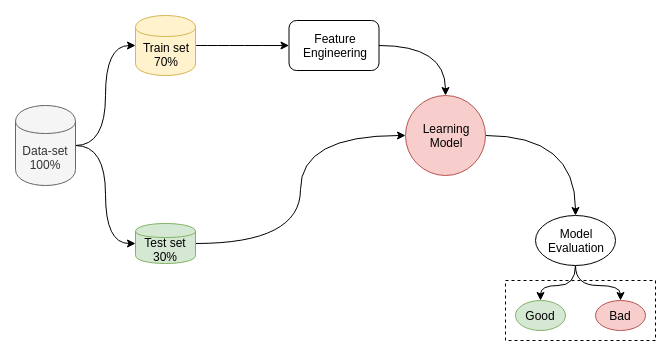

In [78]:
from IPython.display import Image
Image(filename='evalutin.png')

### 6.1.1 Random Forest Model <a name="6.1.1"></a>

A random forest is a supervised machine learning system that uses decision tree algorithms to build it. This algorithm is used to anticipate behavior and results in a variety of sectors, including banking and e-commerce.

According Mbaabu(2020) of a Random Forest Algorithm : 

- It’s more accurate than the decision tree algorithm.
- It provides an effective way of handling missing data.
- It can produce a reasonable prediction without hyper-parameter tuning.
- It solves the issue of overfitting in decision trees.
- In every random forest tree, a subset of features is selected randomly at the node’s splitting point.

In [79]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RF = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

In [80]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
rf = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", rf)


Accuracy: 0.9978914074855034


### 6.1.2 KNN Classifier Model <a name="6.1.2"></a>

The supervised machine learning method K-Nearest Neighbours (KNN) is a form of KNN algorithm. In its most basic version, KNN is considered simple to build, yet it still handles complicated classification jobs. Because it lacks a particular training step, it is a lazy learning algorithm. Instead, while categorizing a new data point or instance, it uses all of the data for training. KNN is a non-parametric learning algorithm, which means it makes no assumptions about the data. Because most real-world data does not match any theoretical assumptions, this is a very helpful characteristic. The KNN method is substantially quicker than others that need training, such as SVM, linear regression, and so on.

The KNN algorithm does not work well with large dimensional data and categorical resources, as with a large number of dimensions, it is difficult for the algorithm to calculate the distance in each dimension. (Müller, Guido, 2017)

Next, I train my model with different values of “K” and capture its accuracy on my test data. Assume we get a table like below

In [81]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

In [82]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

KNN = metrics.accuracy_score(y_test, y_pred)
# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(KNN) )

Accuracy: 0.98


### 6.2 Confusion Matrix  <a name="6.2"></a>

According Brownlee (2021) The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

<AxesSubplot:>

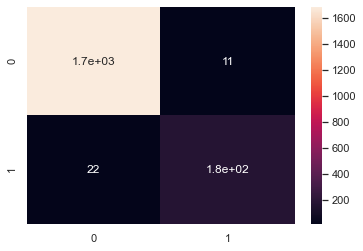

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predict = kNN.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot = True)

### 6.3 Display of the classification report  <a name="6.3"></a>


A classification report is a tool for evaluating the accuracy of a classification algorithm's predictions. How many of your guesses were correct, and how many were incorrect? True Positives, False Positives, True Negatives, and False Negatives, in particular, are used to forecast the metrics of a classification report, as illustrated below. The report is a reprint of a previous post about K-Means.

In [84]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1698
           1       0.94      0.89      0.91       199

    accuracy                           0.98      1897
   macro avg       0.96      0.94      0.95      1897
weighted avg       0.98      0.98      0.98      1897



According Muthukrishnan (2021) The labeled of the graphs are:

- Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives


In [85]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test, y_predict)))

Precision score: 0.9414893617021277


- Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.


In [86]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_test, y_predict)))

Recall score: 0.8894472361809045



- The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

In [87]:
from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_test, y_predict)))

F1 Score: 0.9147286821705426


## 6.4 Hyperparameters <a name="6.4"></a>

Model The attributes that regulate the entire training process are known as hyperparameters. The variables that are usually configured before training a model are listed below.
Number of Epochs Learning Rate
Layers that are not visible
Units that are not visible
Functions of Activation
What are the benefits of using hyperparameters?
Hyperparameters are significant because they directly regulate the training algorithm's behavior and have a major impact on the model's performance.


"A very well set of hyperparameters can make an algorithm really shine." (Prabhu, 2021) 


Choosing optimal hyperparameters plays a key role in the effectiveness of our neural network architecture. Because it has a significant impact on the learned model. If the learning rate is too low, for example, the model will miss significant data patterns. It's possible that if it's too high, it'll cause problems.

In [88]:
import numpy as np
neighbors = np.arange(1, 21)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))      # Declare and initialise the matrix

print(neighbors)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [89]:
from sklearn.neighbors import KNeighborsClassifier
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 10
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train, y_train)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train, y_train)        # Save the score value in the train_accuracy array

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test, y_test)           # Save the score value in the train_accuracy array

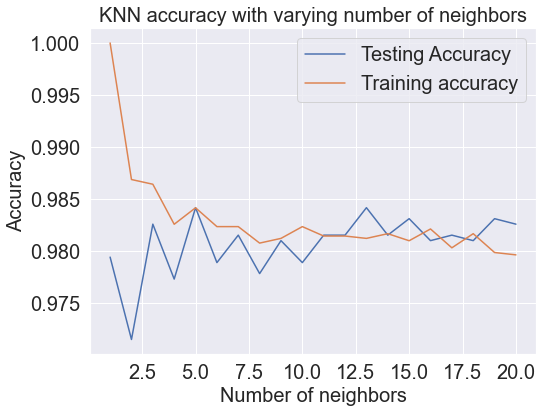

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In the graphic above we can highlight that the results above have similarities after approximately 5 neighbors. With this definition, the results above that number chosen by the KNN model are relatively stable in tests and training.

### 6.5 Cross-validation  <a name="6.5"></a>

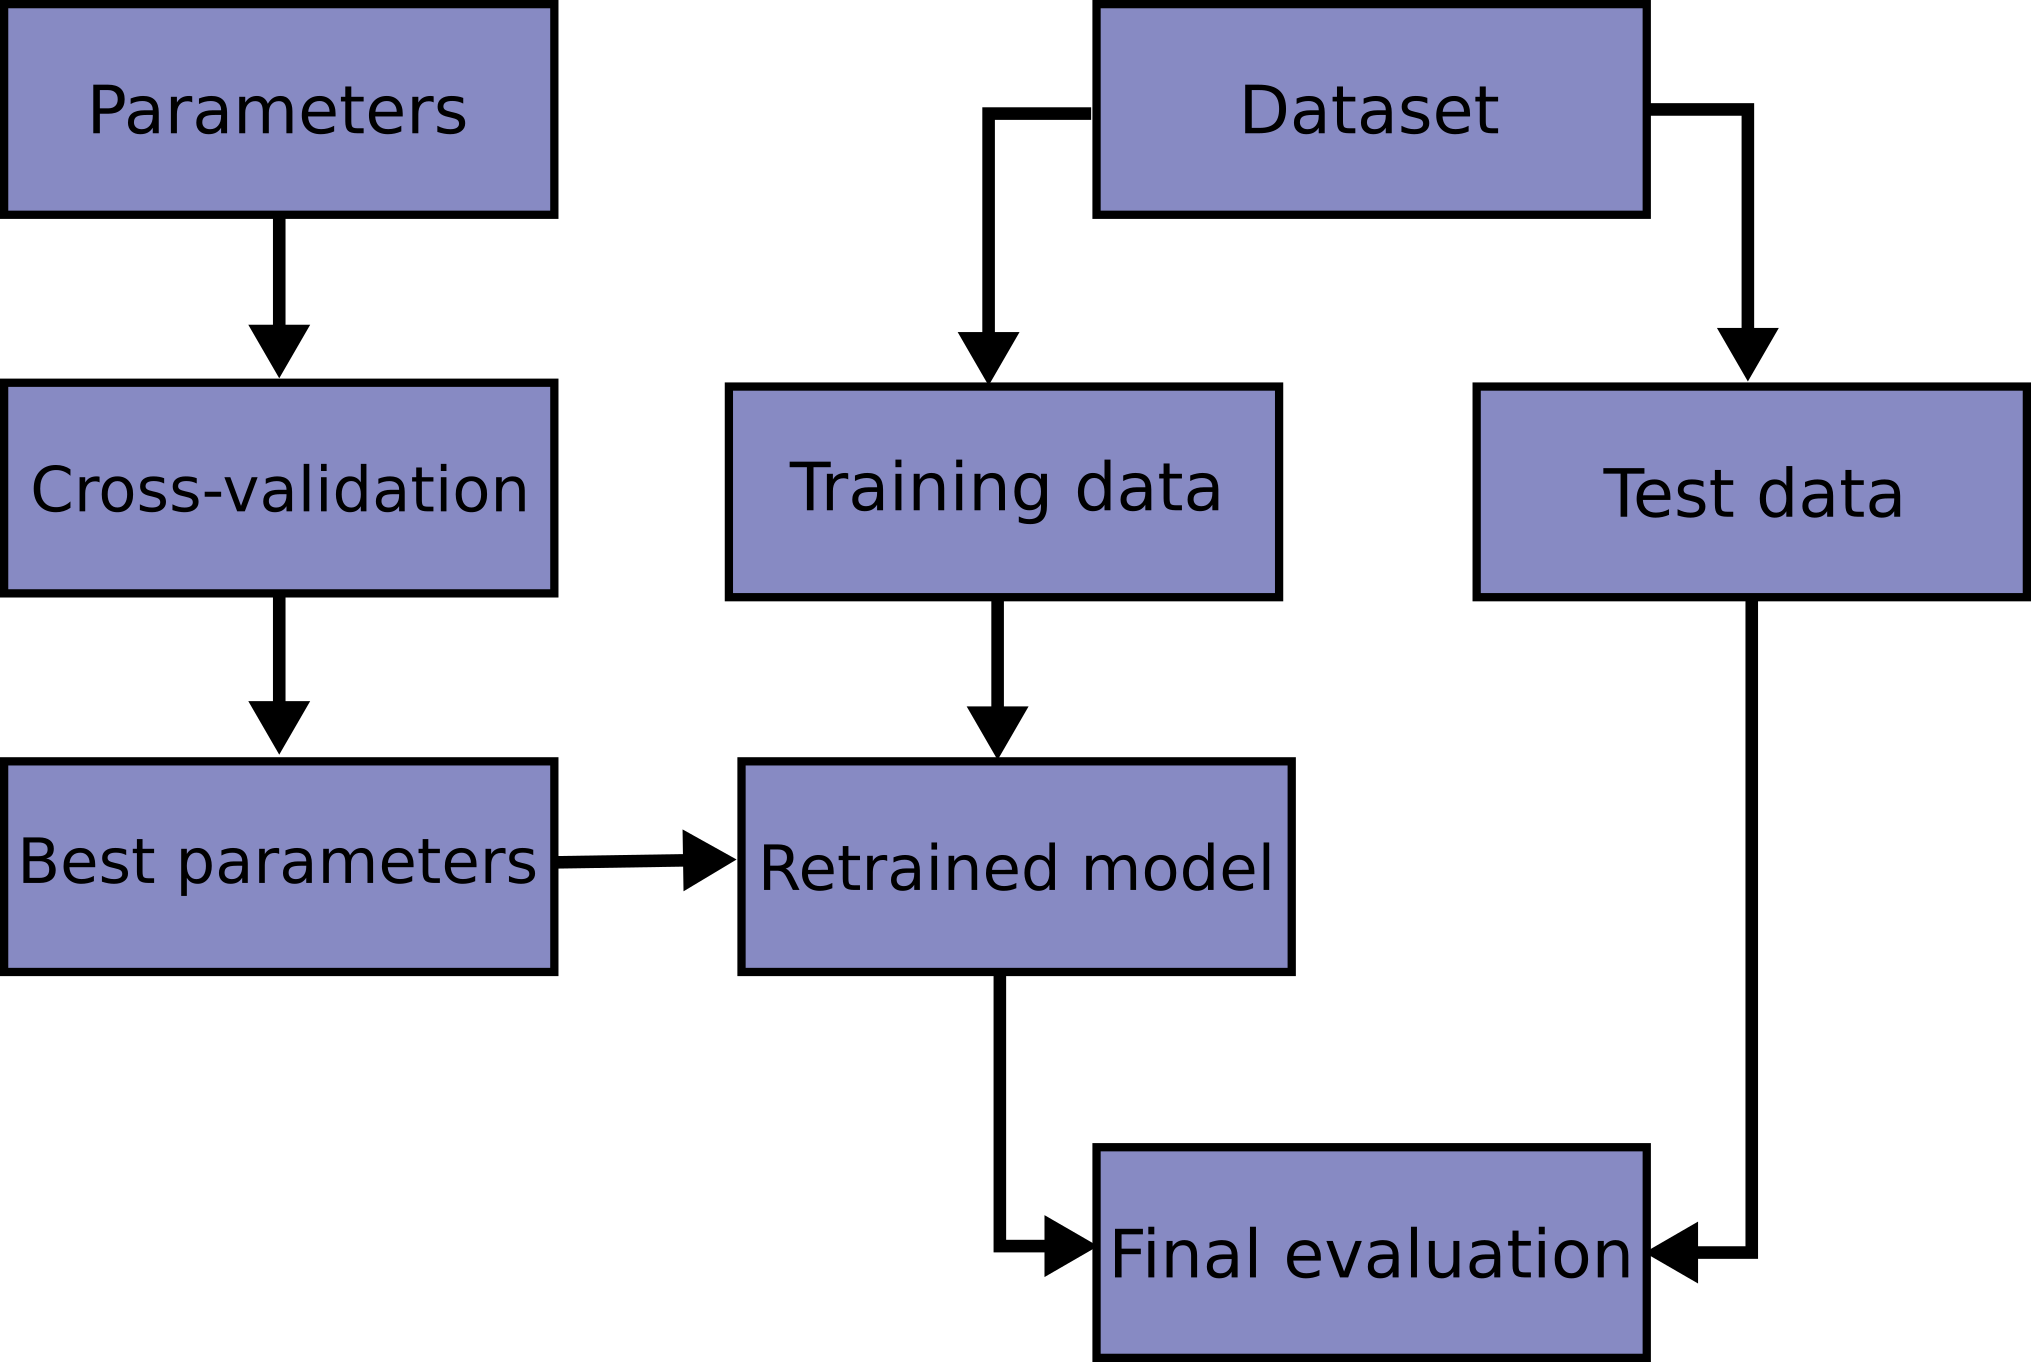

In [91]:
from IPython.display import Image
Image(filename='grid_search_workflow.png')

Using the statement that the models are certainly used. We carry out the Cross-validation. 


In [92]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5)
kf.get_n_splits(X)
5
print(kf)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [1265 1266 1267 ... 6318 6319 6320] TEST: [   0    1    2 ... 1262 1263 1264]
TRAIN: [   0    1    2 ... 6318 6319 6320] TEST: [1265 1266 1267 ... 2526 2527 2528]
TRAIN: [   0    1    2 ... 6318 6319 6320] TEST: [2529 2530 2531 ... 3790 3791 3792]
TRAIN: [   0    1    2 ... 6318 6319 6320] TEST: [3793 3794 3795 ... 5054 5055 5056]
TRAIN: [   0    1    2 ... 5054 5055 5056] TEST: [5057 5058 5059 ... 6318 6319 6320]


### 6.5.1 KNN  <a name="6.5.1"></a>

The model or classifier object, the features, the labels, and the parameter cv, which denotes the K for K-Fold cross-validation, are all passed. For each iteration, the method will return a list of k accuracy values. We utilize the average of them as a consolidated cross-validation score in general.

In [93]:
scoresknn = cross_val_score(kNN, X, y, cv=kf, scoring='neg_mean_absolute_error')
-scoresknn

array([0.02371542, 0.02294304, 0.01740506, 0.01898734, 0.02689873])

In [94]:
-scoresknn.mean()

0.021989918446990546

### 6.5.2 Random Forest <a name="6.5.2"></a>

In [95]:
scores = cross_val_score(RF, X, y, cv=kf, scoring='neg_mean_absolute_error')
-scores

array([0.0055336 , 0.0039557 , 0.00474684, 0.00712025, 0.00553797])

In [96]:
-scores.mean()

0.00537887126632311

Using a table to show the comparison of results we have the following.

In [98]:
results = pd.DataFrame({"Model":['Random Forest','KNeighborsRegressor'],
                      "Accuracy":[rf,KNN]})

In [99]:
results

,Model,Accuracy
0,Random Forest,0.997891
1,KNeighborsRegressor,0.982604


***

# 7. Conclusion <a name="7."></a>

 
 
 

* We can see that we used some data featuring in the dataset to get to the Data preaparation and Machine Learning model steps.
We normalized a column so that all the data would have data to be used in LDA and PCA. We can highlight that we work with variables and two components in both. We got the LDA as a result of 1 dimension. It is shown through the graph. We also use PCA to reduce components and make them ready for use in a Machine Learning model, as a way of making future predictions of data and data behavior.



* We have presented the theory and implementation of LDA as a classification technique. Throughout
the tutorial we have used a 1-class problem as an exemplar. And, it was reformed and highlighted on the PC that we can work with 99% of accurancy obtaining 8 elements, but studies with 2 components followed to analyze the graph and the behavior towards them.





* Developing Macchine Learning models we can highlight the use of 2 models, Random Forest and KNN. Used in supervised model, where accurancy results of 0.997 and 0.98 were obtained, respectively. This defines us that the chosen models perform positively with the components chosen for the analysis.




* KNN 
In the case of this analysis, we divided it into 3 parts, as each part tests a model with a different part calculating the metric chosen to evaluate the model, in which at the end of the process we will have k measures of the chosen evaluation metric, with which it can be calculated the mean and standard deviation. And the results obtained with 3 neighbors are usable and accurate. As a result gives the  array([0.0055336 , 0.0039557 , 0.00474684, 0.00712025, 0.00553797]) a scores.mean by 0.021989918446990546



* Random Forest 
Is the model that brings more accurancy about the prediction applycation, then the accurancy bring 99% of results. In case of using this model, get the best result. Used a cross validation to provide authenticity of this modelling outcomes. As a result gives the array([0.0055336 , 0.0039557 , 0.00474684, 0.00712025, 0.00553797]), a scores.mean by 0.00537887126632311.


### References  <a name="r"></a>


   
   
   Balakrishnama, S (2021) LINEAR DISCRIMINANT ANALYSIS - A BRIEF TUTORIAL . Avaiable at: http://datajobstest.com/data-science-repo/LDA-Primer-[Balakrishnama-and-Ganapathiraju].pdf (Accessed 12 January 2021)

   Brownlee, Jason(2021) 4 Types of Classification Tasks in Machine Learning. Avaiable at: https://machinelearningmastery.com/types-of-classification-in-machine-learning/. ( Acessed 06 January 2022)
   
   Campbell MJ, Machin D., Walters SJ.(2007) Medical Statistics: a Commonsense Approach 4th ed. Chichester: Wiley-Blackwell
   
   Choudhury A. (2019) Curse Of Dimensionality And What Beginners Should Do To Overcome It. Avaiable at: https://analyticsindiamag.com/curse-of-dimensionality-and-what-beginners-should-do-to-overcome-it/ (Accessed 04 January 2021)
   
   Duvva,Pranavi (2021) LDA vs. PCA. Avaiable at: https://towardsai.net/p/data-science/lda-vs-pca (Accessed 05 January 2021)
   
   Prabhu (2021) Understanding Hyperparameters and its Optimisation techniques. Avaiable at: https://towardsdatascience.com/understanding-hyperparameters-and-its-optimisation-techniques-f0debba07568 ( Acessed 04 January 2022)
      
   Mbaabu, Onesmus (2020) Introduction to Random Forest in Machine Learning. Avaiable at: https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/Features (Accessed 10 January 2021)
   
   Muthukrishnan (2021) Understanding the Classification report through sklearn. Avaiable at: https://muthu.co/understanding-the-classification-report-in-sklearn/ (Accessed 09 January 2021)
   
   Müller, A.C. Guido, S. (2017) Introduction to Machine Learning with Python, A Guide for Data Scientists. USA. O’Reilly.
   
   
   
   


***

## Libraries

https://matplotlib.org/stable/index.html


https://numpy.org/doc/stable/index.html


https://pandas.pydata.org/pandas-docs/stable/index.html

https://plotly.com/graphing-libraries/

https://seaborn.pydata.org/index.html

***